In [1]:
# Anova e teste de variância

In [18]:
# import de bibliotecas
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [19]:
# Carregamento da base de dados
tratamento = pd.read_csv('anova.csv', sep = ';')
tratamento.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


In [20]:
tratamento.shape

(24, 3)

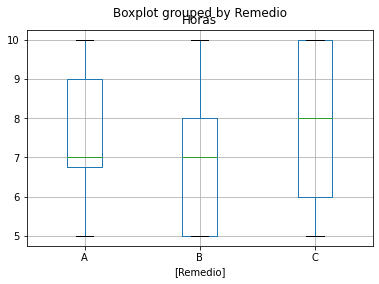

In [24]:
# Boxplot agrupando dados pelo remedio(Boxplot de dados discretos)
tratamento.boxplot(by = 'Remedio', grid = False)

In [ ]:
# Queremos verificar se existe variação no tempo que cada remedio levou para fazer efeito.

In [29]:
# Criação do modelo de regressão linear e execução do teste
# horas - variavel de resposta
# remedio - variavel independente
modelo1 = ols('Horas ~ Remedio', data = tratamento).fit()
resultados1 = sm.stats.anova_lm(modelo1)
# # Observar p-value(PR(>F)) > 0,05, hipotese nula de que não há diferença significativa
resultados1

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


In [30]:
# Criação do segundo utilizando mais atributos e execução do teste
# horas - variavel de resposta
# remedio * sexo- variavel independente
modelo2 = ols('Horas ~ Remedio * Sexo', data = tratamento).fit()
resultados2 = sm.stats.anova_lm(modelo2)
# Nenhum valor de p mostra diferença significativa
resultados2

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


In [32]:
# Se houver diferença significativa o teste de Tukey é executado para ver onde estaria a diferença
# Execução do teste de Tukey e visualização dos graficos com os resultados
mc = MultiComparison(tratamento['Horas'], tratamento['Remedio'])
resultado_teste = mc.tukeyhsd()
print(resultado_teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   -0.625 0.7861 -3.0803 1.8303  False
     A      C    0.375    0.9 -2.0803 2.8303  False
     B      C      1.0 0.5668 -1.4553 3.4553  False
---------------------------------------------------


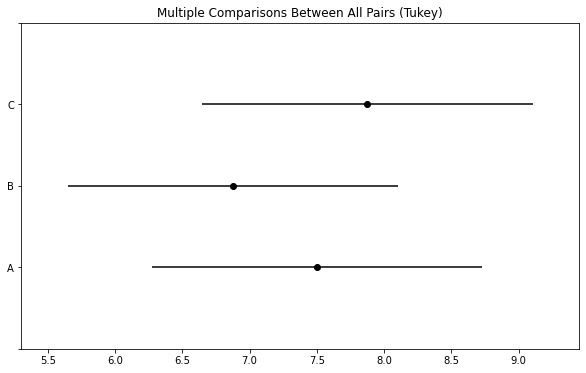

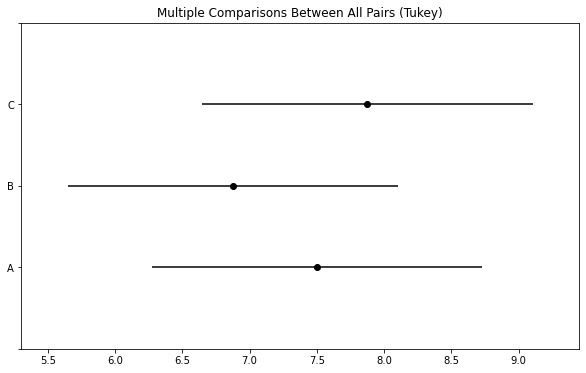

In [33]:
resultado_teste.plot_simultaneous()